In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


* Cuantitativos 
    - Discretos: Available Extra Rooms in Hospital, staff_available, Age, Visitors with Patient, Stay (in days)
    - Continuos: Admission_Deposit
* Cualitativos
    - Nominales: Department, Ward_Facility_Code, doctor_name, gender, Type of Admission, health_conditions
    - Ordinales: Severity of Illness,
    - Binario: Insurance

In [3]:
df = pd.read_csv('hospitalizaciones_train.csv')

In [4]:
df

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,8
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,9
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,9
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,9


In [5]:
df.drop(['Available Extra Rooms in Hospital','Ward_Facility_Code','doctor_name','staff_available','patientid','gender','Insurance','Admission_Deposit'],axis=1,inplace=True)

In [6]:
#columnas nominales
ohe=['Department', 'Ward_Facility_Code','doctor_name', 'Age', 
     'Type of Admission', 'health_conditions',
     'Visitors with Patient',  'Admission_Deposit']
#columna ordinal
ord=['Severity of Illness']
#columnas binarias
binar = ['gender','Insurance']

In [7]:
X=df.iloc[:,0:-1]
y= np.where(df.iloc[:,-1]<=8,0,1)

In [8]:
X

,Department,Age,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient
0,gynecology,41-50,Trauma,Extreme,Diabetes,4
1,gynecology,31-40,Trauma,Minor,Heart disease,2
2,gynecology,21-30,Trauma,Extreme,Diabetes,2
3,gynecology,31-40,Urgent,Moderate,None,4
4,anesthesia,71-80,Trauma,Moderate,Diabetes,2
...,...,...,...,...,...,...
409995,gynecology,31-40,Trauma,Minor,Asthama,3
409996,gynecology,21-30,Trauma,Extreme,Other,4
409997,gynecology,21-30,Emergency,Minor,Asthama,4
409998,gynecology,21-30,Trauma,Moderate,Other,2


Tranformo y segun lo pedido.

## ver columnas para codificar

## codifico

## Ordinal

In [9]:
gravedad_enfer = ['Extreme','Moderate','Minor']

In [10]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[gravedad_enfer])

In [11]:
X['Severity of Illness'] = oe.fit_transform(X[['Severity of Illness']])

## label

In [12]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

In [13]:
le.fit(X[['Age']])

c:\Users\Carlos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [14]:
X['Age'] = le.transform(X[['Age']])

c:\Users\Carlos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
df['gender'] = df['gender'].map({'female':0,'male':1})

KeyError: 'gender'

In [59]:
from sklearn.preprocessing import LabelBinarizer

for col in ['gender','Insurance']:
    binarizer = LabelBinarizer()
    binarizer.fit(X[col])
    X[col]=binarizer.transform(X[col])

In [90]:
X

,Department,Age,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Stay (in days)
0,gynecology,41-50,Trauma,Extreme,Diabetes,4,8
1,gynecology,31-40,Trauma,Minor,Heart disease,2,9
2,gynecology,21-30,Trauma,Extreme,Diabetes,2,7
3,gynecology,31-40,Urgent,Moderate,None,4,8
4,anesthesia,71-80,Trauma,Moderate,Diabetes,2,34
...,...,...,...,...,...,...,...
409995,gynecology,31-40,Trauma,Minor,Asthama,3,8
409996,gynecology,21-30,Trauma,Extreme,Other,4,9
409997,gynecology,21-30,Emergency,Minor,Asthama,4,9
409998,gynecology,21-30,Trauma,Moderate,Other,2,9


## OneHotEncoder

In [16]:
df_copy=X.copy()

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
# ohe.fit_transform(df_copy[['Department']]).toarray()

In [18]:
for col in ['Department', 'Type of Admission', 'health_conditions']:
    df_dep = pd.DataFrame(ohe.fit_transform(df_copy[[col]]).toarray(),columns=[col+'_'+str(ohe.categories_[0][i])for i in range(len(ohe.categories_[0]))])
    df_copy = pd.concat([df_copy,df_dep],axis=1)
    df_copy.drop(col,axis=1,inplace=True)

In [19]:
df_copy

,Age,Severity of Illness,Visitors with Patient,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,health_conditions_Asthama,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other
0,4,0.0,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3,2.0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,1.0,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,7,1.0,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,3,2.0,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
409996,2,0.0,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
409997,2,2.0,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
409998,2,1.0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## corr

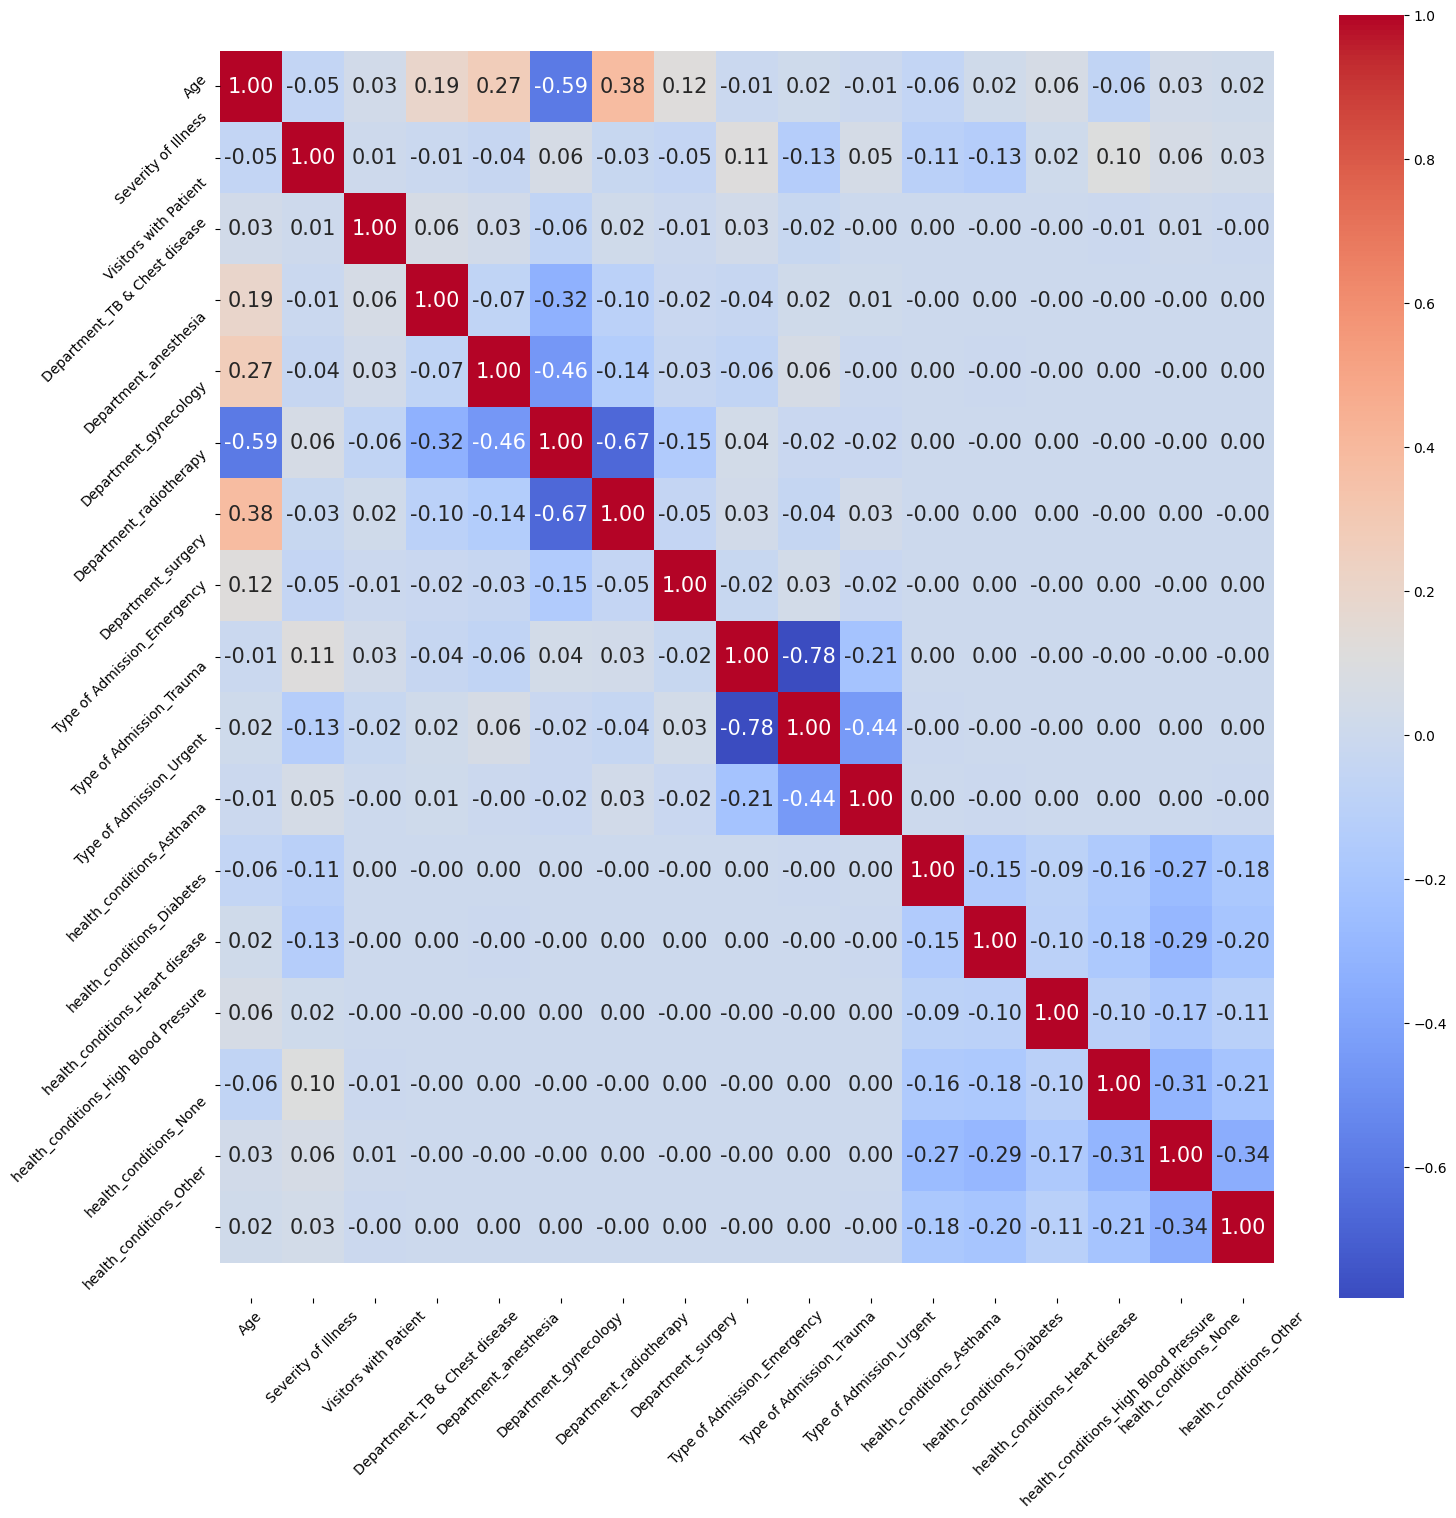

In [142]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(17,17))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()
corr = df_copy.corr()
plot_corre_heatmap(corr)

In [20]:
from sklearn.preprocessing import StandardScaler
#normalizamos los datos
scaler=StandardScaler()
scaler.fit(df_copy) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df_copy)# Ahora si, escalo los datos y los normalizo

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=14)
X_nuevo = pca.fit_transform(X_scaled) 

In [26]:
print("shape of X_pca", X_nuevo.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:14]))

shape of X_pca (410000, 17)
[1.34990628e-01 1.10170254e-01 8.28461942e-02 7.55367221e-02
 7.16007342e-02 6.94990870e-02 6.78484928e-02 6.63511828e-02
 6.32172520e-02 6.29514307e-02 6.00764024e-02 5.68194899e-02
 4.88858177e-02 2.92063129e-02 6.30304342e-28 5.85657208e-28
 4.27593593e-28]
suma: 1.0


In [ ]:
X_nuevo.shape

## LaberlBinarizer

## modelo

In [30]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.30, random_state=42, stratify = y)

In [34]:
clf_xgb = xgb.XGBClassifier(n_estimators=150,
                            seed=42, use_label_encoder= False)
                            
# Entrenamos
clf_xgb.fit(X_train, y_train)

c:\Users\Carlos\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [35]:
import sklearn.metrics as metrics

y_train_pred = clf_xgb.predict(X_train)
y_test_pred = clf_xgb.predict(X_test)

# Evaluamos
print('Accuracy en train:', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy en test:', metrics.accuracy_score(y_test, y_test_pred))

Accuracy en train: 0.7000487804878048
Accuracy en test: 0.6924552845528456
